In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [4]:
star_wars.head(10)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [5]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'][:5]

1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'][:5]

1     True
2      NaN
3    False
4     True
5     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

In [10]:
#rename columns

test = star_wars.columns[3:9].tolist()

new_names = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6']

for i, item in enumerate(test):
    star_wars.rename(index=str, columns={test[i]:new_names[i]}, inplace=True)
    
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [11]:
movie_names = star_wars.iloc[0:1, 3:9].values.tolist()

movie_names = [val for sublist in movie_names for val in sublist]

movie_names

['Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

In [12]:
i = 0

for movie in movie_names:
    
    saw_movie = {
    movie: True,
    np.nan: False
    }

    star_wars[new_names[i]] = star_wars[new_names[i]].map(saw_movie)
    
    i += 1

In [13]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [14]:
test = star_wars.columns[9:15].tolist()

new_names = ['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5','rank_6']

for i, item in enumerate(test):
    star_wars.rename(index=str, columns={test[i]:new_names[i]}, inplace=True)
    
star_wars.columns[9:15]

Index(['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6'], dtype='object')

In [15]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
star_wars.iloc[:3,9:15]

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


In [17]:
star_wars[9:15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific
11,3.292638e+09,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,3.292635e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,3.292609e+09,True,False,True,True,True,True,True,True,3.0,...,Very favorably,Greedo,No,NaN,No,Male,18-29,"$25,000 - $49,999",Bachelor degree,South Atlantic
14,3.292597e+09,True,True,True,True,True,True,True,True,4.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,30-44,"$50,000 - $99,999",Graduate degree,Mountain
15,3.292587e+09,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,No,Male,18-29,NaN,High school degree,East North Central


In [18]:
mean_rank = star_wars.iloc[:,9:15].mean()
mean_rank

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64

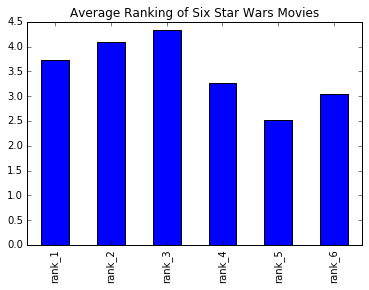

In [19]:
mean_rank.plot.bar(title="Average Ranking of Six Star Wars Movies")

## Findings

So far survey columns about people seeing star wars movies and how they ranked and have been cleaned up for analysis. The columns 3:15 were turned into true, false or nan values in order clean them up. Mapping functions were used mainly to achieve this.

In the chart above, the average ranking of six Star Wars movies is displayed. A lower value is deemed a better ranking. The column "rank_5" refers to the movie the *Empire Strikes Back*. It got the best rank at roughly 2.5. The column "rank_3" refers to the movie *Star Wars: Episode III – Revenge of the Sith*. It got the worst ranking of roughly 4.34. 

Overall it appears the first three Star Wars movied released in the theatre had better ranking than the more recent Star Wars movies released in the theatre. 

In [28]:
sum_seen = star_wars.iloc[:,3:9].sum()
sum_seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

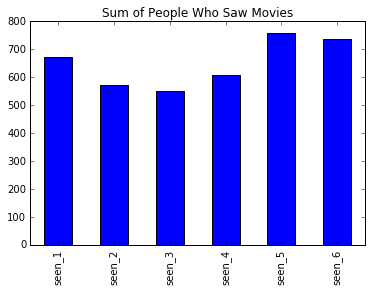

In [29]:
sum_seen.plot.bar(title="Sum of People Who Saw Movies")

## Findings

In the bar chart above, sum of people who Star Wars movies is displayed. The bar chart visually communicates that more people saw earlier movies released in the the theatre (seen_4, seen_5, seen_6) than more recent Star Wars movies released in the theatre.  

This could help explain why the earlier movies got a higher ranking above. More people saw the earlier Star Wars movies, therefore they were more likely to rate them higher than newer Star Wars movies.

Also another reason is if more people see a movie, the more likley the movie will receive a higher rating. There appears to be correlation between ranking of movie and sum of people of who saw the movie. 



In [22]:
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [30]:
mean_fan_rank = fan.iloc[:,9:15].mean()
mean_non_fan_rank = non_fan.iloc[:,9:15].mean()

df_rank = pd.concat([mean_fan_rank,mean_non_fan_rank], axis=1)

df_rank.columns = ['fan','non_fan']

df_rank

,fan,non_fan
rank_1,4.141304,2.936396
rank_2,4.342391,3.591549
rank_3,4.417423,4.193662
rank_4,2.932971,3.933099
rank_5,2.333333,2.862676
rank_6,2.829710,3.471831


In [39]:
sum_fan_seen = fan.iloc[:,3:9].sum()
sum_non_fan_seen = non_fan.iloc[:,3:9].sum()

df_seen = pd.concat([sum_fan_seen,sum_non_fan_seen], axis=1)

df_seen.columns = ['fan','non_fan']

df_seen

,fan,non_fan
seen_1,500,173
seen_2,463,108
seen_3,450,100
seen_4,483,124
seen_5,538,220
seen_6,537,201


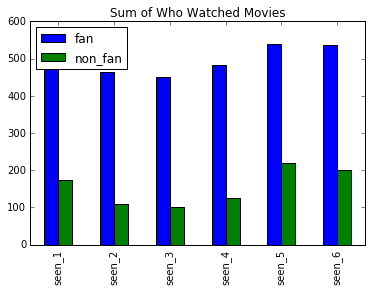

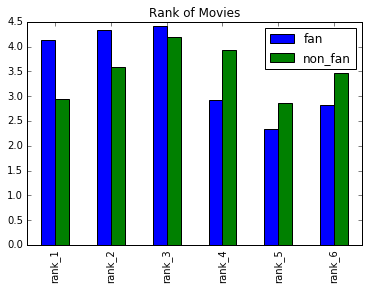

In [48]:
df_seen.plot(kind='bar', title='Sum of Who Watched Movies')

df_rank.plot(kind='bar', title='Rank of Movies')

In [47]:
sums = df_seen.sum()
percent_fan = 1 - (sums[1] / sums[0])
percent_fan

0.68832043083136996

In [49]:
df_seen.corr()

,fan,non_fan
fan,1.000000,0.978349
non_fan,0.978349,1.000000


In [51]:
df_rank.describe()

,fan,non_fan
count,6.000000,6.000000
mean,3.499522,3.498202
std,0.904929,0.529477
min,2.333333,2.862676
25%,2.855525,3.070255
50%,3.537138,3.531690
75%,4.292120,3.847711
max,4.417423,4.193662


In [52]:
df_rank.corr()

,fan,non_fan
fan,1.000000,0.362693
non_fan,0.362693,1.000000


## Findings

What stands out to me is percent of fans vs non-fans surveyed. Almost 68% of survey sample claims to be a Star Wars fan. That can skew the results of analysis to fans opinions more than non-fans.

Second there is a strong correlations with fans who saw the movies and non-fans who saw the movies. The correlation is about 98%. Suggesting that if fans see the movies, non-fans are likely to see the movie in a similar proportion.

Third, fans had a higher standard deviation than non-fans ranking movies. Suggesting that fans opinions were more volatile than non-fans about the movies. A fan was likely to either like the movie or not like the movie to a higher degree. 

Fourth, there seems to be weak correlation between the ranking of movies of fans and non-fans. The correlation is about 36%. Suggesting that fans and non-fans tended to rate movies similar, but not very precisely. 

## Future Steps

Here are some potential next steps:

Try to segment the data by columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
Clean up columns 15 to 29, which have to do with what characters are viewed favorably and unfavorably.
Which character is the most liked?
Which character is the most disliked?
Which character creates the most controversy? (split between dislikes and likes)